# Bank Marketing Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Task 3

### "Build a decision Tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a data set such as the bank marketing dataset  from the UCI Machine Learning Repository".

The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree

### Reading the data

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df_cate = df.select_dtypes(exclude = 'number')
df_cate.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [5]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


## EDA

In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
print(df_cate.value_counts())

job          marital  education  default  housing  loan  contact   month  poutcome  deposit
management   married  tertiary   no       no       no    cellular  aug    unknown   no         108
blue-collar  married  secondary  no       yes      no    unknown   may    unknown   no         103
                      primary    no       yes      no    unknown   may    unknown   no          90
management   single   tertiary   no       no       no    cellular  aug    unknown   no          63
technician   married  secondary  no       no       no    cellular  aug    unknown   no          60
                                                                                              ... 
management   married  secondary  no       yes      yes   cellular  nov    failure   no           1
                                                                                    yes          1
                                                                          unknown   no           1
                 

### checking null values

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* There are no null values in the data set

### Checking outliers

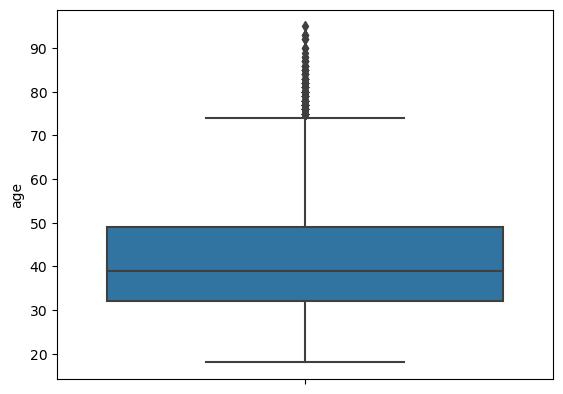

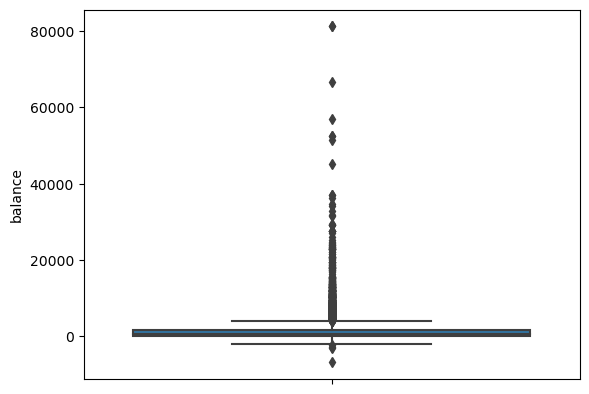

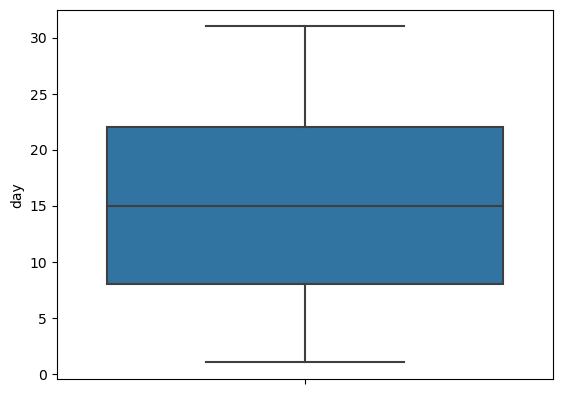

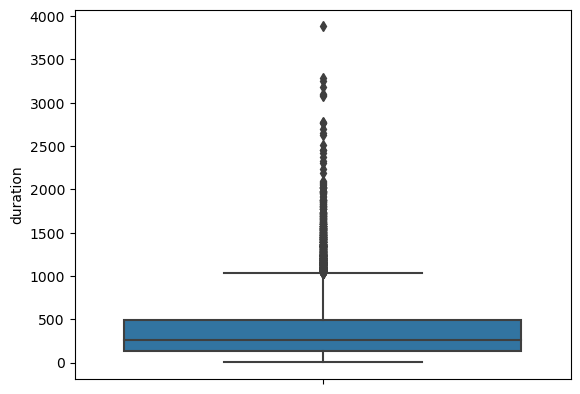

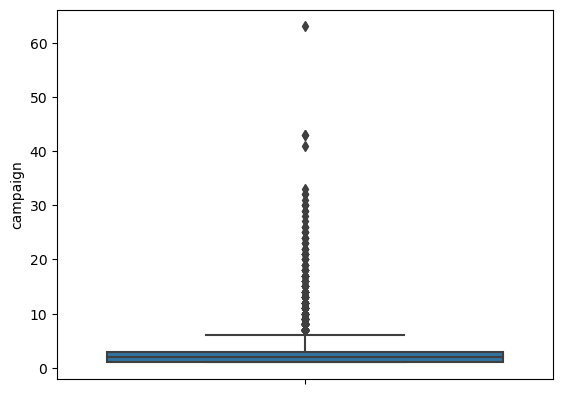

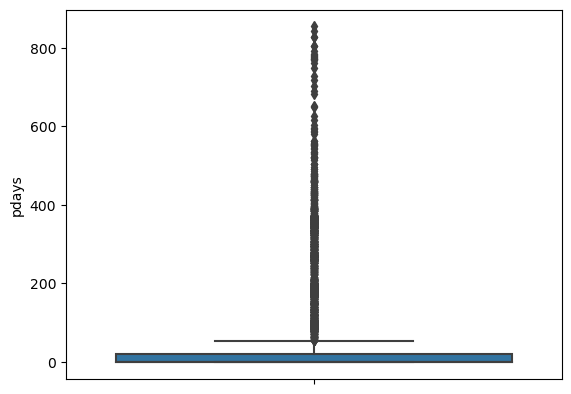

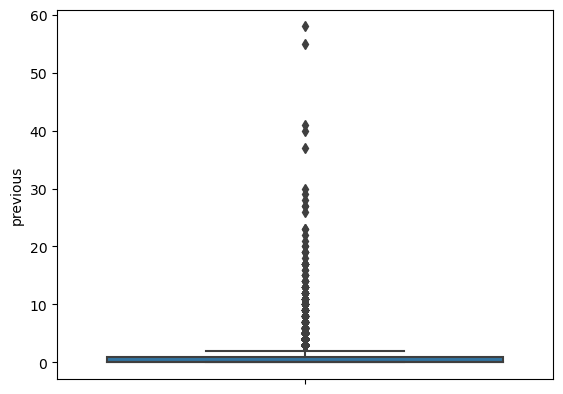

In [11]:
for i in df_num:
    sns.boxplot(y = df[i])
    plt.show()

In [12]:
# treating outliers

q3 = df.quantile(0.75)
q1 = df.quantile(0.25)

iqr = q3 - q1

upperlimit = q3+1.5*iqr
lowerlimit = q1-1.5*iqr

In [13]:
df_wo_outlier = df[~((df>upperlimit)|(df<lowerlimit)).any(axis=1)]


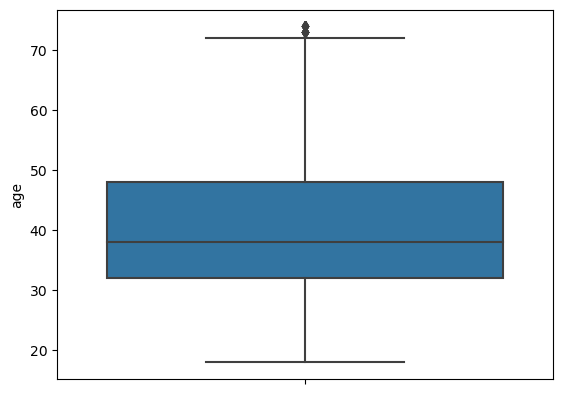

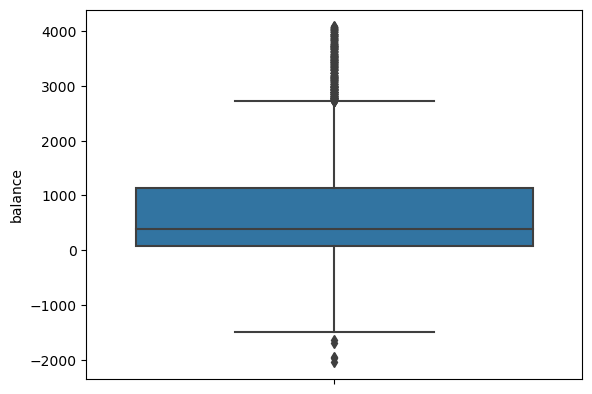

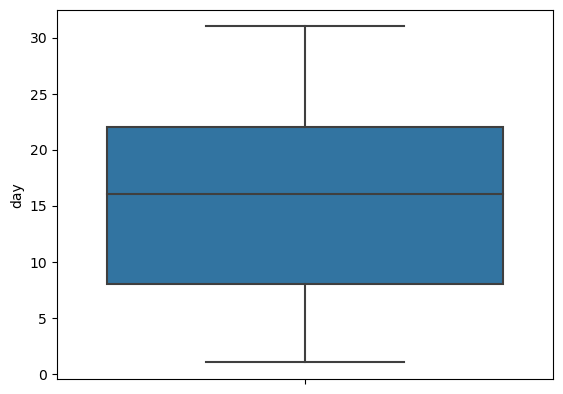

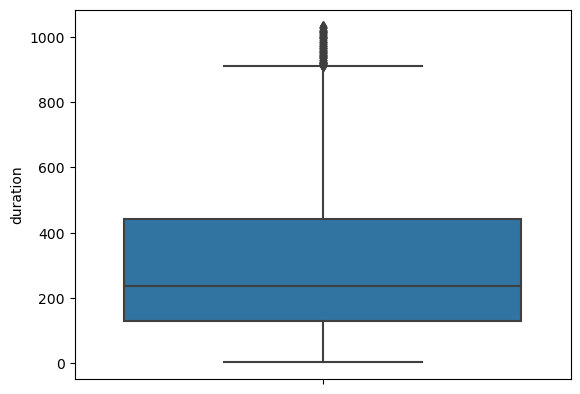

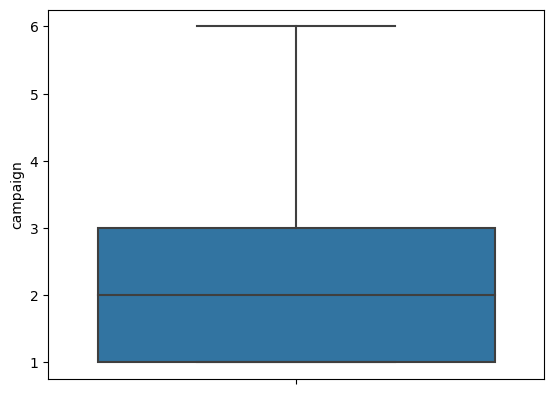

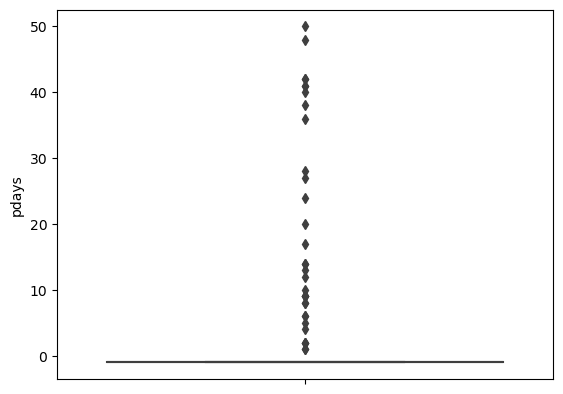

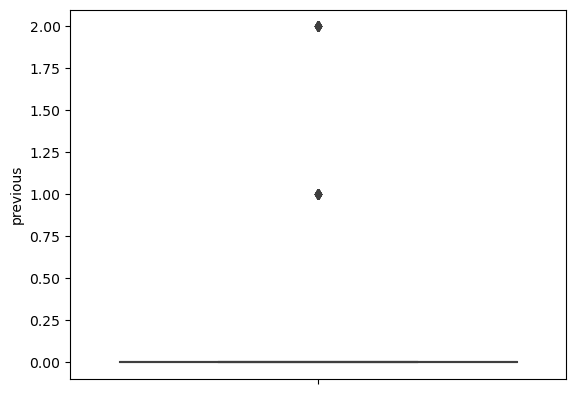

In [14]:
for i in df_num:
    sns.boxplot(y = df_wo_outlier[i] )
    plt.show()

* most of the ouliers have been removed by treating

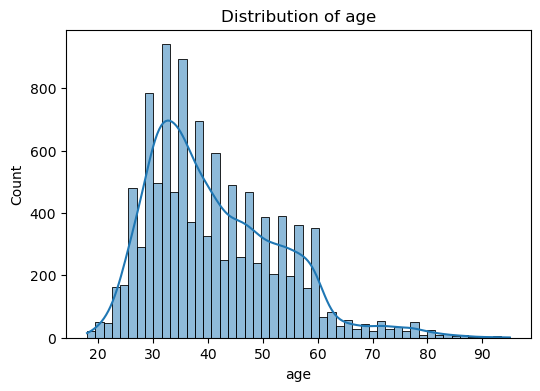

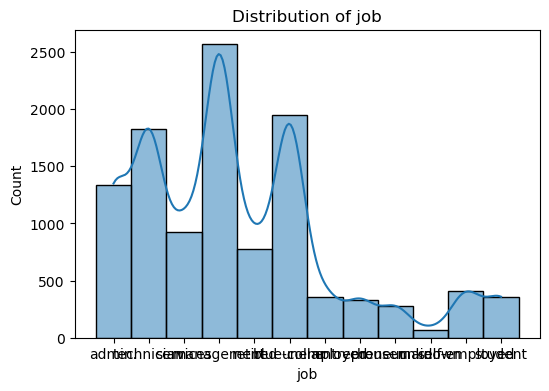

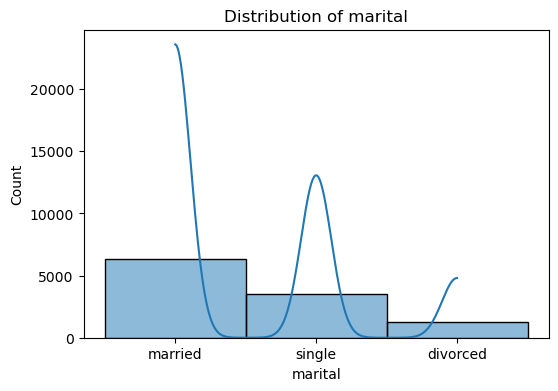

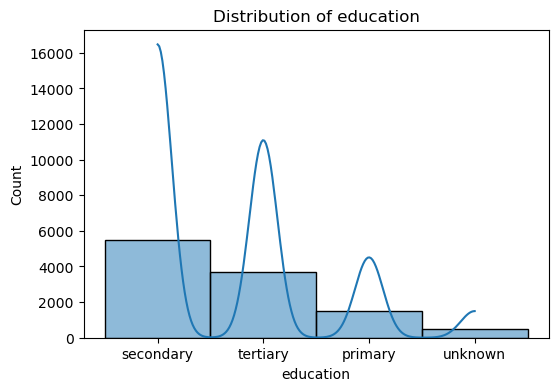

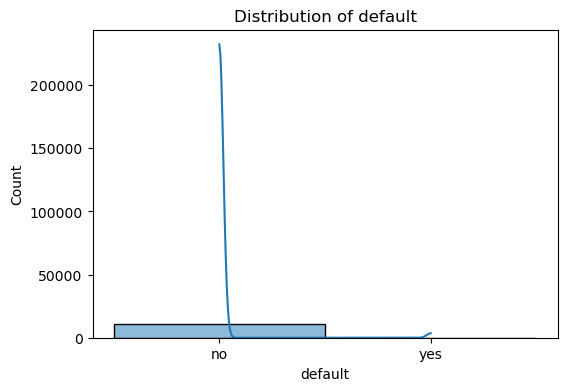

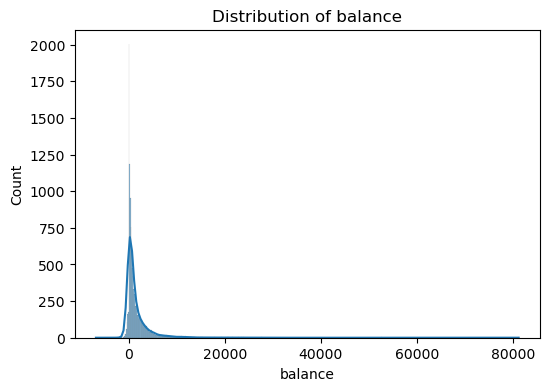

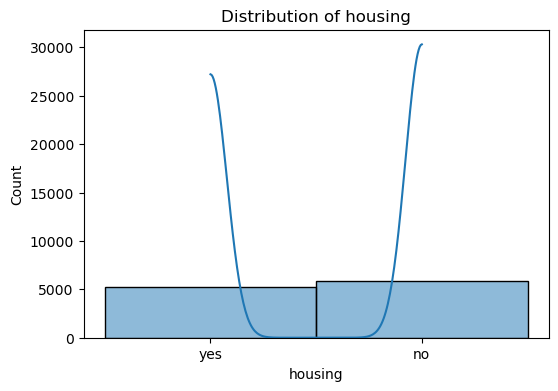

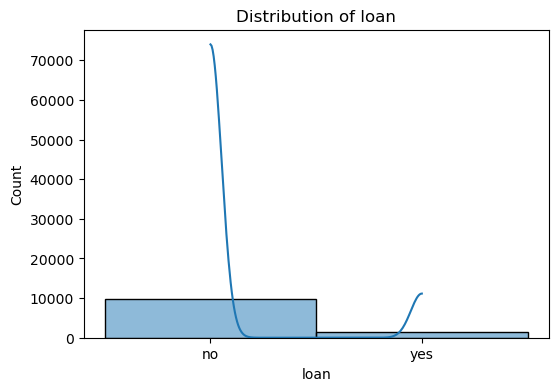

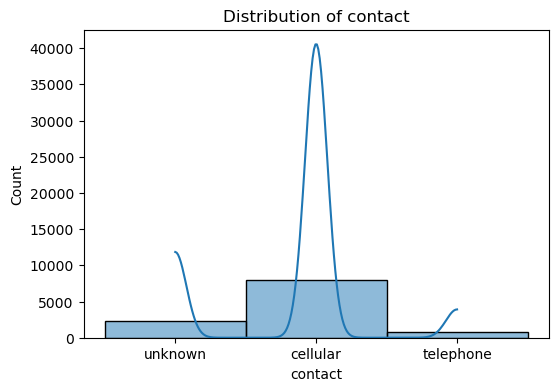

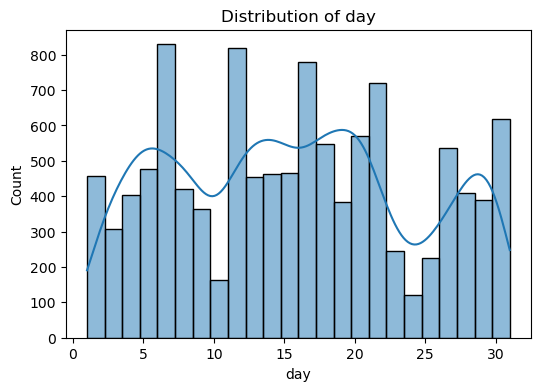

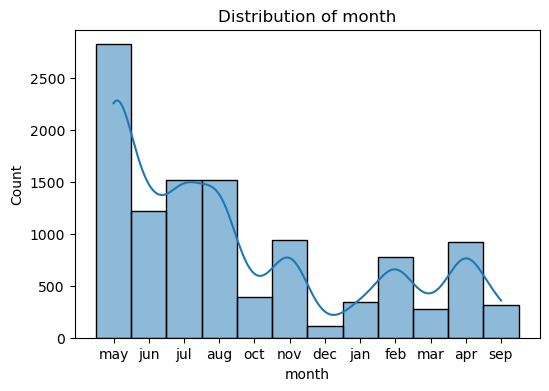

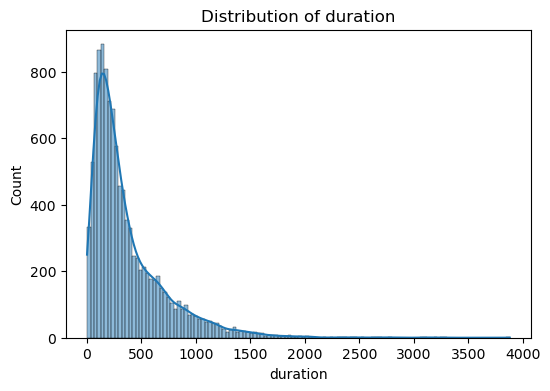

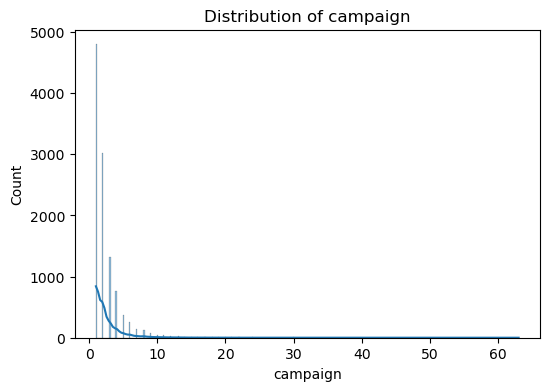

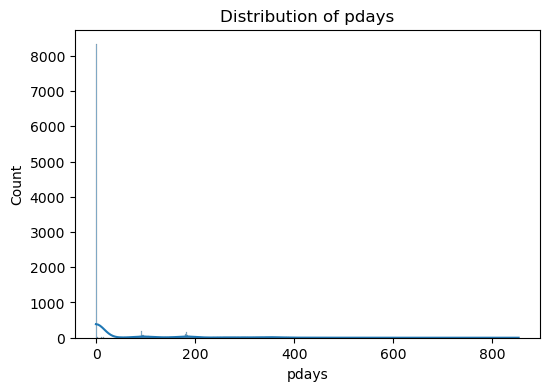

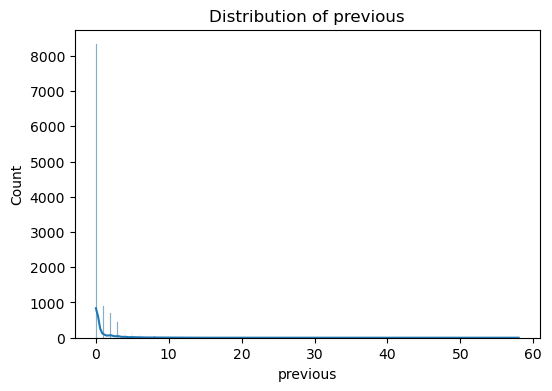

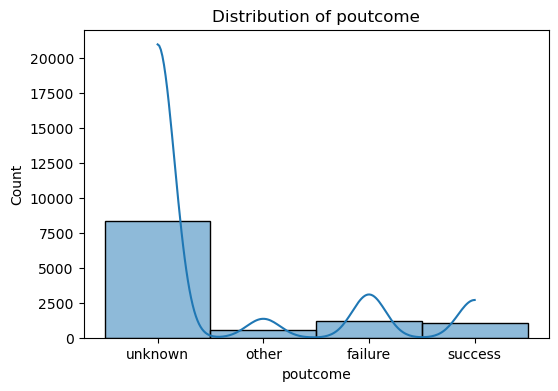

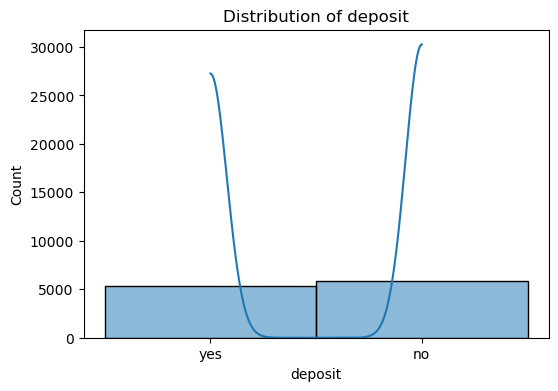

In [15]:
# Visualize the distribution of numerical variables
for col in df_wo_outlier:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()



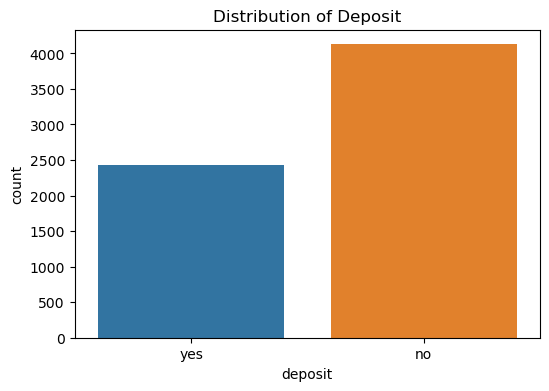

In [19]:
# Visualize the distribution of the target variable ('deposit')
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df_wo_outlier)
plt.title('Distribution of Deposit')
plt.show()



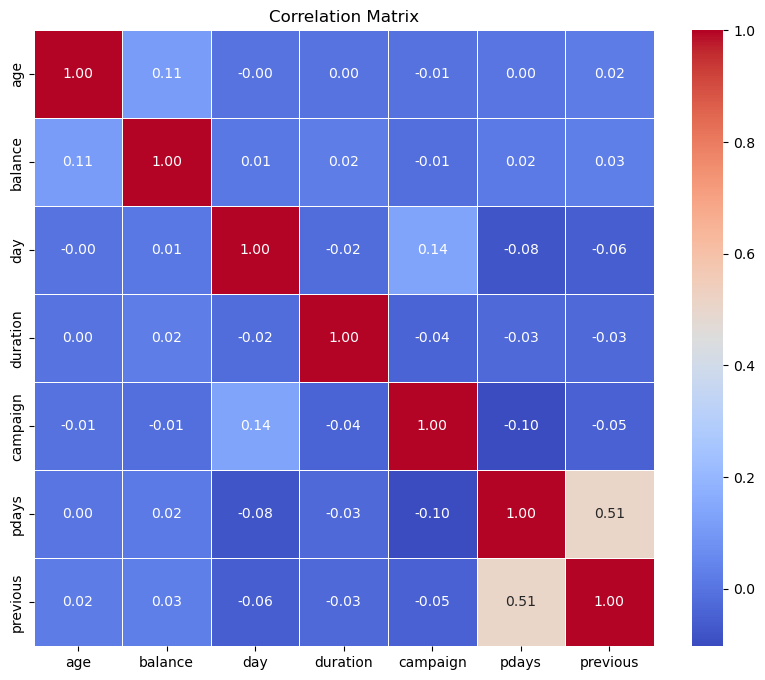

In [22]:
# Visualize the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



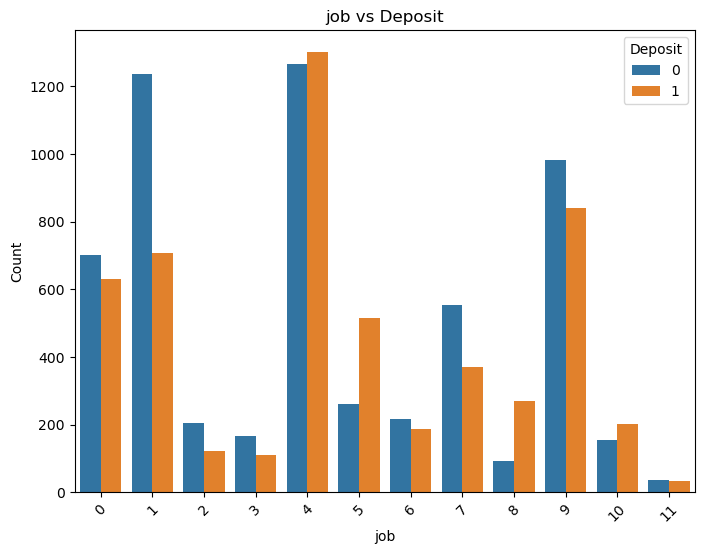

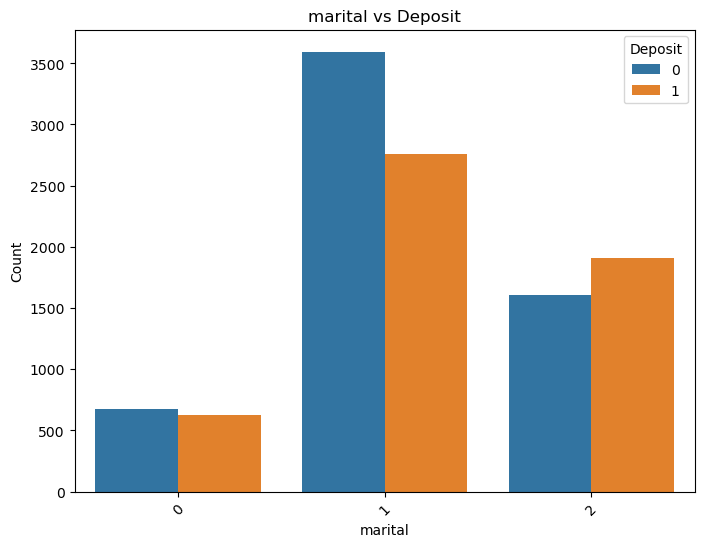

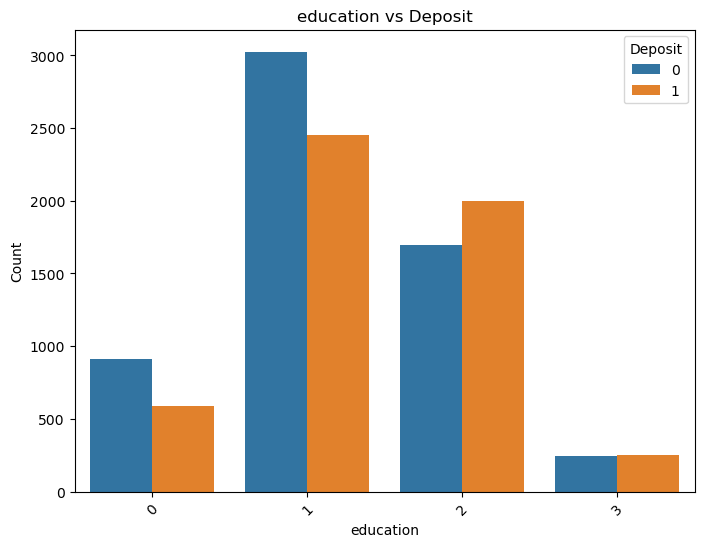

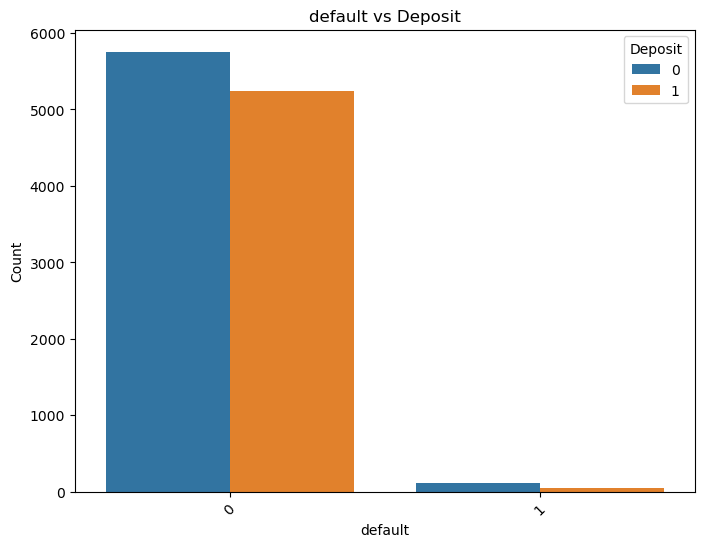

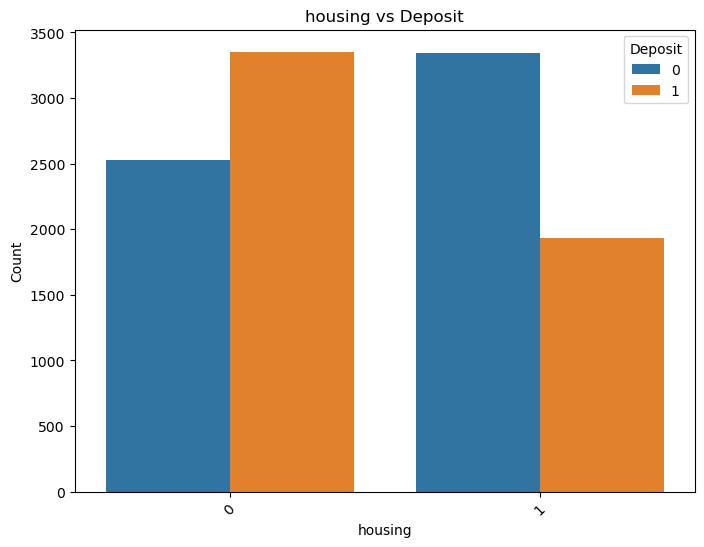

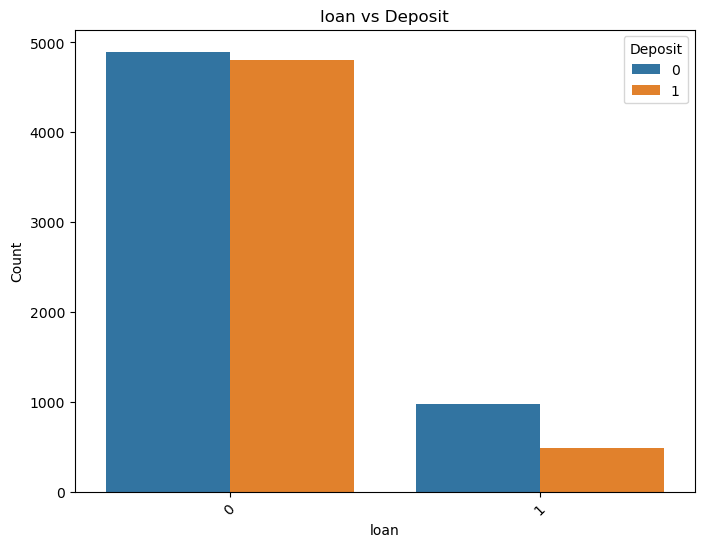

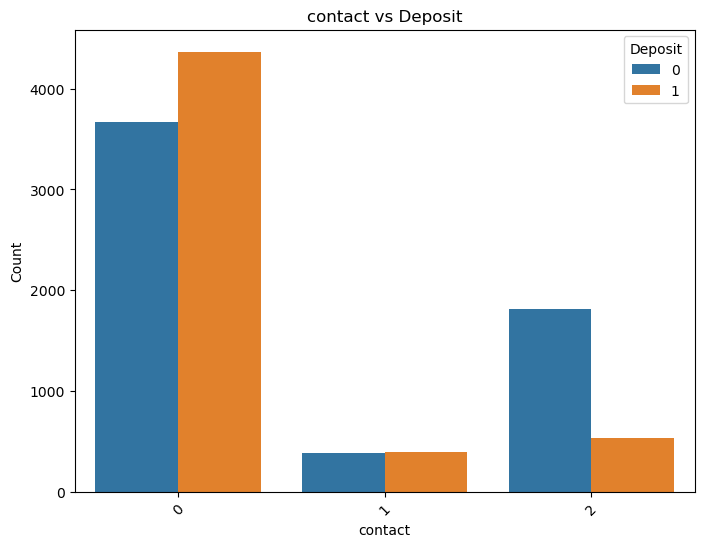

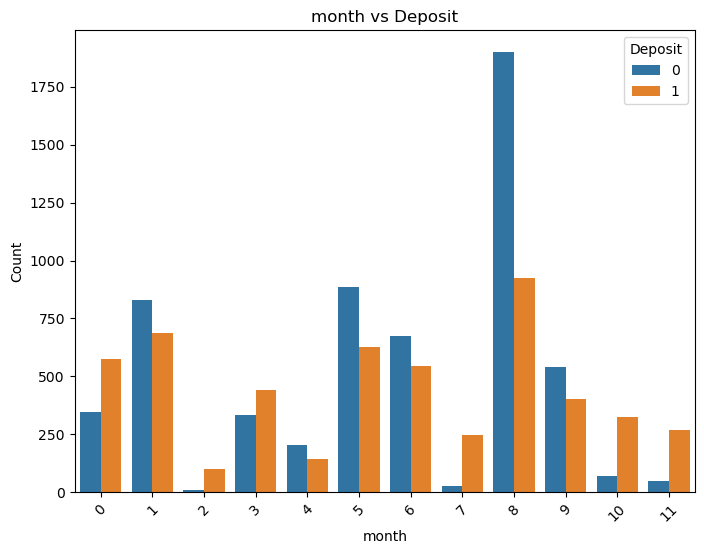

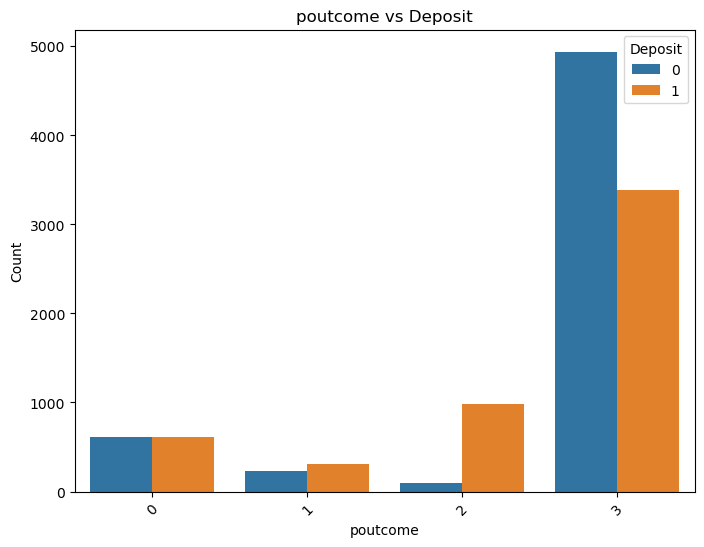

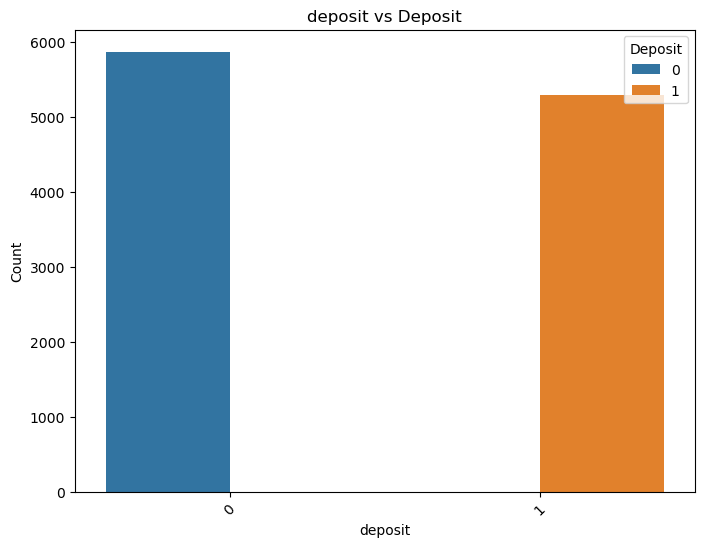

In [46]:
# Visualize the relationship between categorical variables and the target variable

categorical_cols = df.select_dtypes(include=['object']).columns
for col in df_cate:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='deposit', data=df)
    plt.title(f'{col} vs Deposit')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Deposit', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()


In [26]:
# Importing necessary libraries to build Decision Tree Classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

### Data preprocessing

##### Encode categorical variables

In [30]:
label_encoder = LabelEncoder()

for col in df_cate:
    df[col] = label_encoder.fit_transform(df[col])



In [32]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['deposit'])
y = df['deposit']



In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)



In [34]:
# Evaluating the model
# Checking accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.786833855799373

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1154
           1       0.78      0.77      0.78      1079

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233


Confusion Matrix:
[[923 231]
 [245 834]]


In [39]:
# Calculate True Positives, True Negatives, False Positives, and False Negatives from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(923, 231, 245, 834)

In [40]:
923+231+245+834

2233

In [ ]:
# Calculate precision, recall, and F1-score

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



In [51]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8007165248544559

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1154
           1       0.82      0.75      0.78      1079

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


Confusion Matrix:
[[979 175]
 [270 809]]


In [53]:
 from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8531124048365427

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1154
           1       0.83      0.88      0.85      1079

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233


Confusion Matrix:
[[954 200]
 [128 951]]


In [57]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}






In [58]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)  

In [62]:
# Perform GridSearchCV
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print()
print("Best Score (Accuracy):", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best Score (Accuracy): 0.8099450127195336


In [63]:
# Use the best estimator for prediction
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [64]:
# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with best parameters:", accuracy)
print("\nClassification Report:")


print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy with best parameters: 0.8163905060456784

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1154
           1       0.81      0.81      0.81      1079

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


Confusion Matrix:
[[946 208]
 [202 877]]


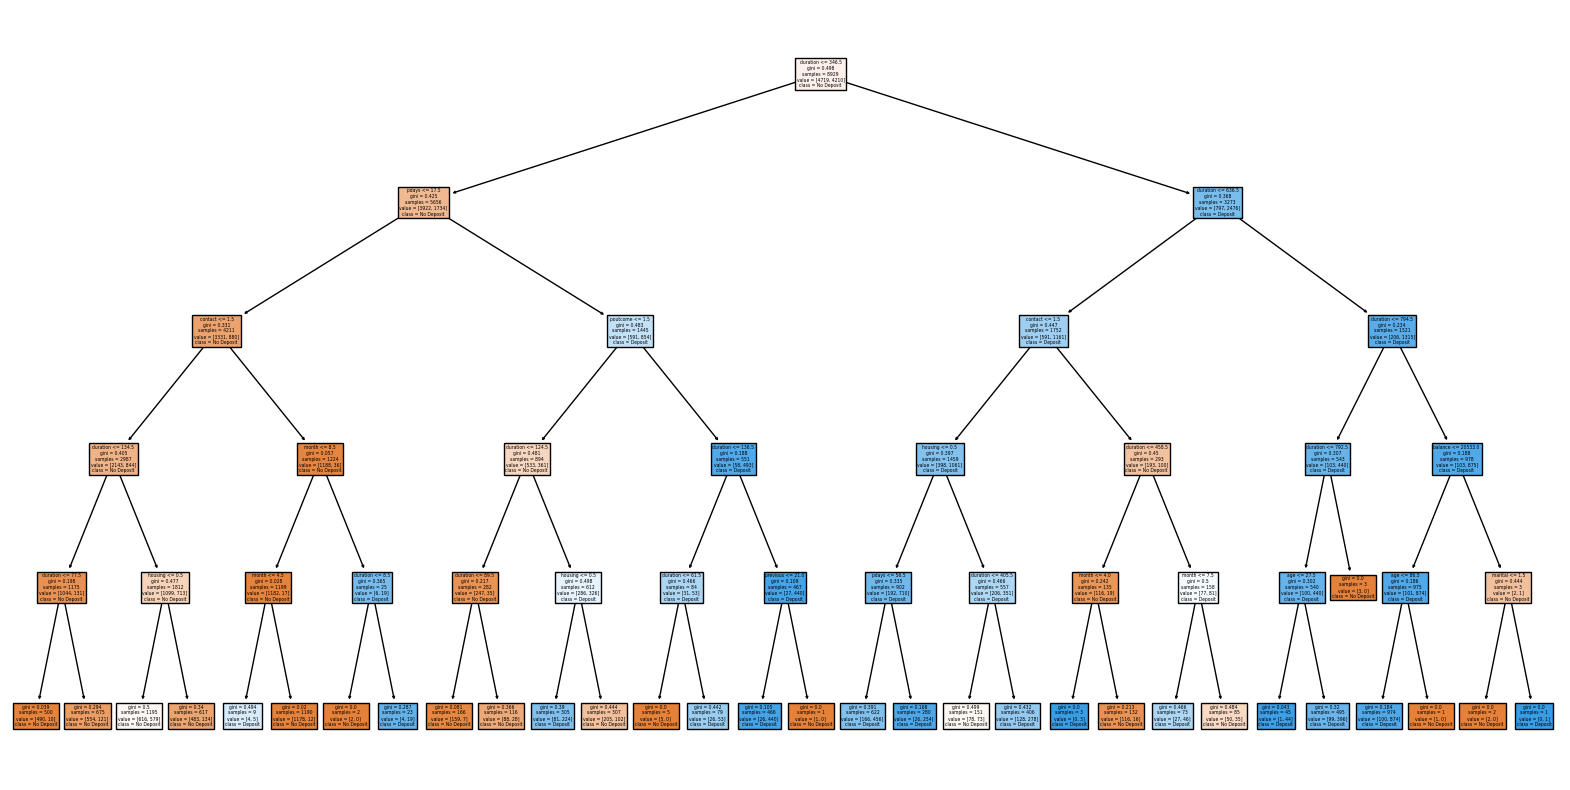

In [65]:
# Visualizing the Decision Tree

plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Deposit'])
plt.show()
